# **DIABETES RISK PREDICTION - HEALTHCARE AI**

**Objective:** Predict diabetes risk from patient health metrics using machine learning and explainable AI.

Dataset: [Pima Indians Diabetes Dataset (Kaggle)](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

Features: Glucose, BMI, Age, Insulin, BloodPressure, SkinThickness, Pregnancies  
Target: Outcome (0 = No Diabetes, 1 = Diabetes)

# **1. SETUP & LIBRARIES**

In this section, we import all necessary Python libraries required for data processing, visualization, modeling, and explainability.

- **pandas, numpy:** Data manipulation
- **matplotlib, seaborn:** Data visualization
- **scikit-learn:** Machine learning models and evaluation metrics
- **xgboost:** Gradient boosting model
- **shap:** Explainable AI for feature impact

In [1]:
!pip install shap xgboost

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap

# **2. LOAD DATASET**

We load the Pima Indians Diabetes Dataset, which contains health metrics for patients.  

- **Target variable:** Outcome (0 = No Diabetes, 1 = Diabetes)  
- **Features:** Glucose, BMI, Age, Insulin, BloodPressure, etc.

We also display the first few rows to inspect the data.

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [5]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Pregnancies', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Pregnancies']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Pregnancies')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Glucose']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Glucose')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['BloodPressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('BloodPressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['SkinThickness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('SkinThickness')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

# **3. CHECK MISSING / ZERO VALUES**

- Some features contain zero values which are **clinically invalid**, e.g., zero BMI or zero glucose.  
- These zeros are treated as missing values and replaced with the **median** of the respective feature.  
- This ensures that the dataset is clean and ready for modeling.

In [8]:
print("Missing values per column:\n", df.isnull().sum())

# In this dataset, zero may represent missing for some columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Impute missing values with median (robust for skewed health data)
imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

print("\nAfter imputation, missing values per column:\n", df.isnull().sum())


Missing values per column:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

After imputation, missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **4. EXPLORATORY DATA ANALYSIS (EDA)**

- **Objective:** Understand feature distributions, correlations, and outcome balance.  
- **Techniques used:**
  - Descriptive statistics (`df.describe()`)
  - Correlation heatmap
  - Histograms for feature distributions
  - Outcome distribution plot
  - Pairplots for key features vs outcome

**Insights from EDA:**  
- Some features are highly correlated, e.g., Glucose and Outcome  
- Distribution of outcome is balanced enough for modeling

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


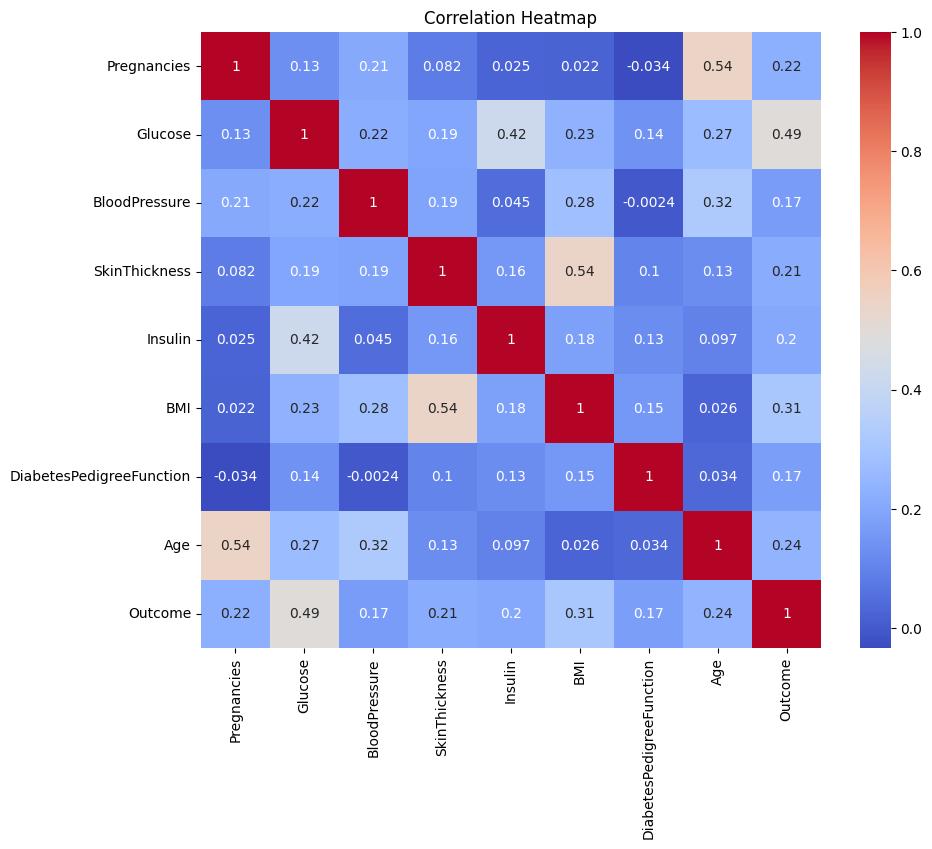

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


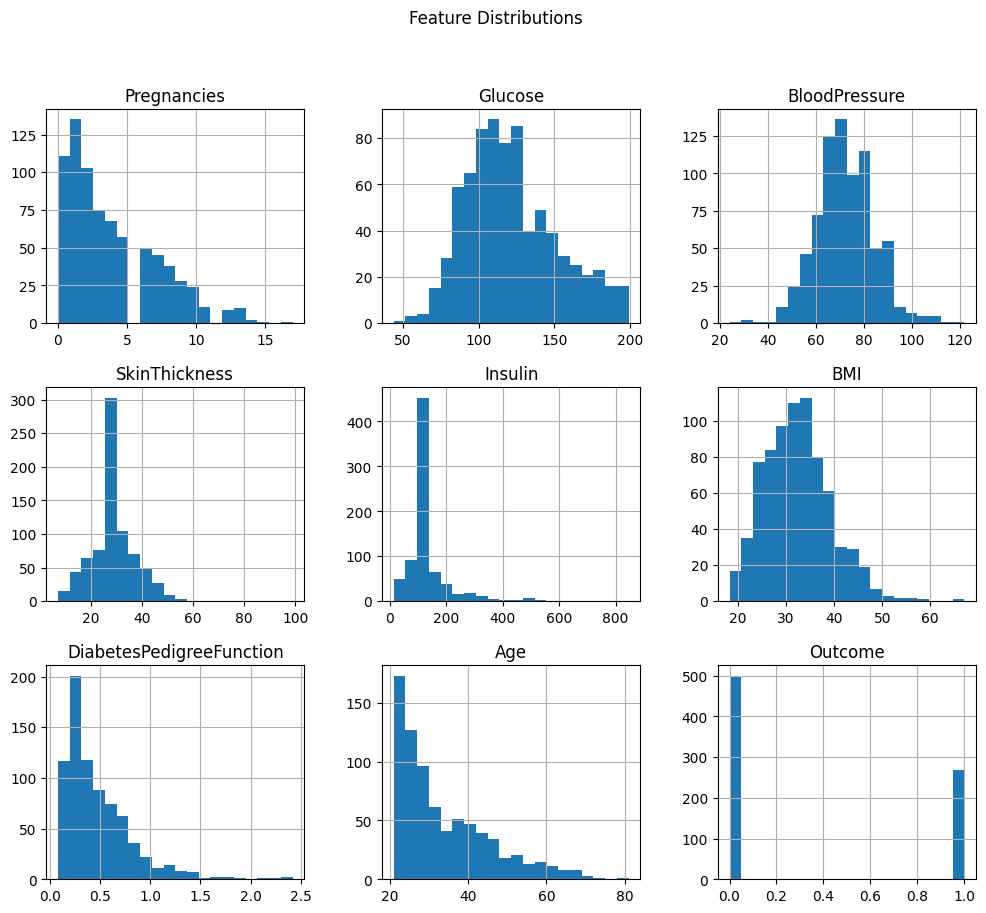

In [11]:
# Distribution of features (histograms)
df.hist(bins=20, figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()


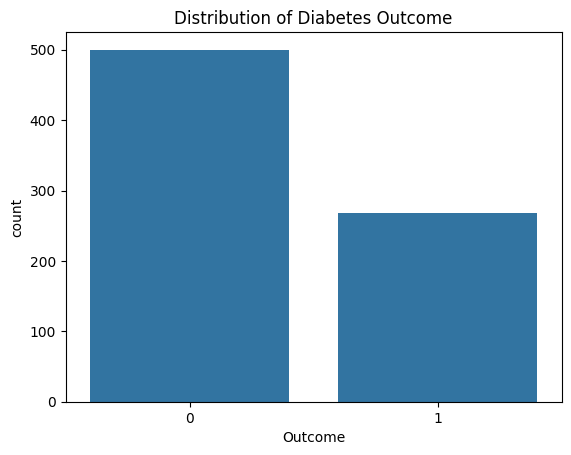

In [12]:
# Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Diabetes Outcome")
plt.show()


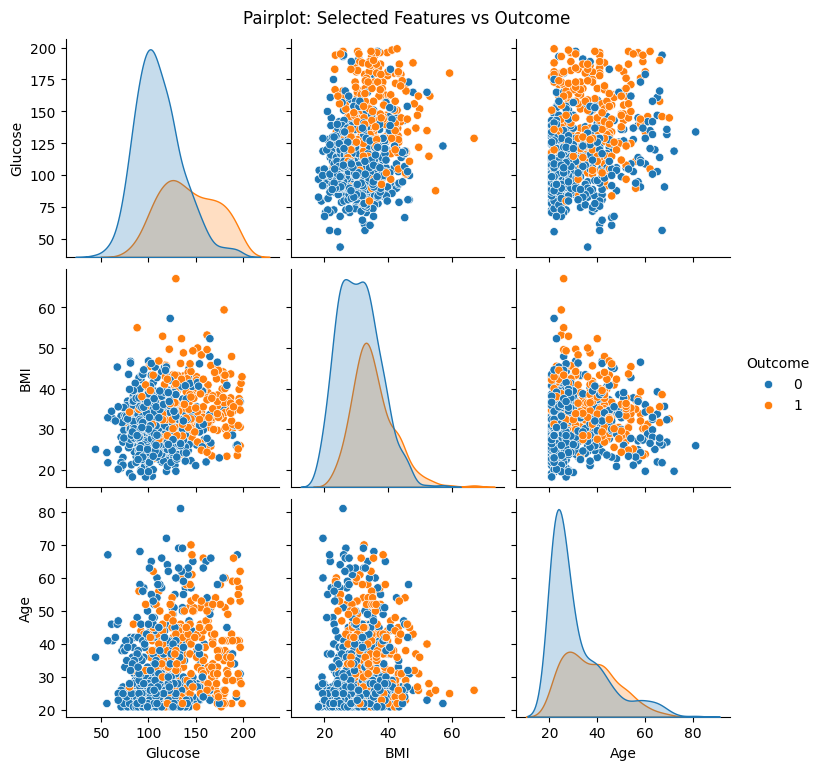

In [13]:
# Pairplot for selected features vs Outcome (optional for admission showcase)
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome', diag_kind='kde')
plt.suptitle("Pairplot: Selected Features vs Outcome", y=1.02)
plt.show()


# **5. FEATURE SCALING & TRAIN-TEST SPLIT**

- Standardized features using **StandardScaler** for better model convergence.  
- Split the dataset into **training (80%)** and **testing (20%)** sets using stratification to maintain class balance.


In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 614
Testing samples: 154


# **6. MODELLING**

We train three models to compare performance:

1. **Logistic Regression:** Baseline linear model  
2. **Random Forest Classifier:** Ensemble model, handles non-linearities  
3. **XGBoost Classifier:** Gradient boosting, often provides best performance

All models are trained on the **training set** and predictions are made on the **testing set**.


LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

RANDOM FOREST CLASSIFIER

In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


XGBOOST CLASSIFIER

In [18]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# **7. EVALUATION & METRICS**

- Evaluate model performance using:
  - **Accuracy**
  - **ROC-AUC**
  - **Confusion Matrix**
  - **Classification Report**
- Visualize **ROC curves** to compare model discrimination ability.
- Observations:
  - Logistic Regression: ~70% accuracy  
  - Random Forest: ~74% accuracy  
  - XGBoost: ~75% accuracy (best)

DEFINE EVALUATION FUNCTION

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

def evaluate_model(y_true, y_pred, y_prob, model_name="Model"):
    print(f"===== {model_name} =====")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_prob), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

    # ROC Curve
    RocCurveDisplay.from_predictions(y_true, y_prob)

EVALUATE LOGISTIC REGRESSION

===== Logistic Regression =====
Accuracy: 0.7013
ROC-AUC: 0.8128
Confusion Matrix:
 [[81 19]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154





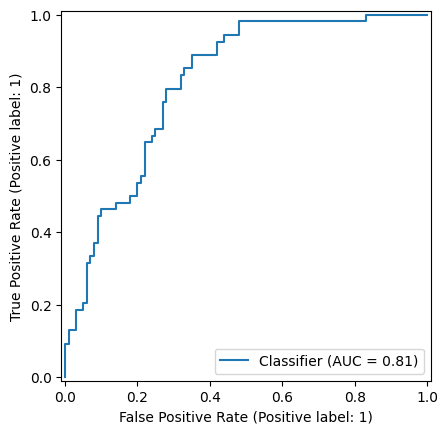

In [20]:
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

EVALUATE RANDOM FOREST

===== Random Forest =====
Accuracy: 0.7403
ROC-AUC: 0.8173
Confusion Matrix:
 [[84 16]
 [24 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154





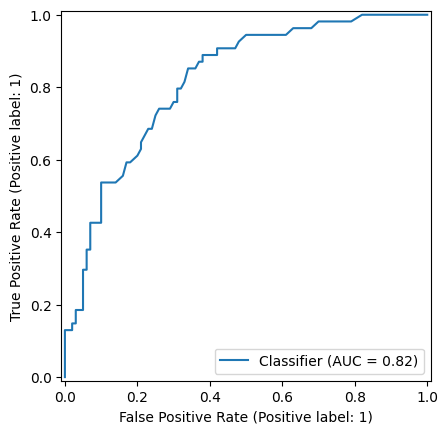

In [21]:
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

EVALUATE XGBOOST

===== XGBoost =====
Accuracy: 0.7597
ROC-AUC: 0.8081
Confusion Matrix:
 [[84 16]
 [21 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154





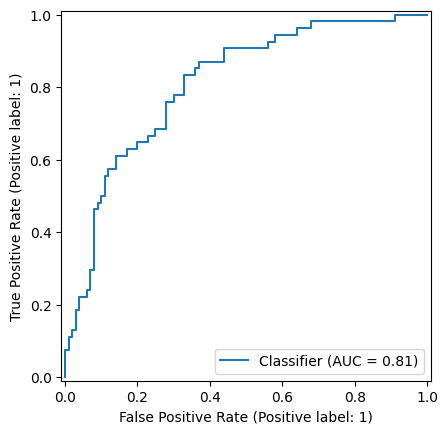

In [22]:
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

MODEL COMPARISON VISUALISATION

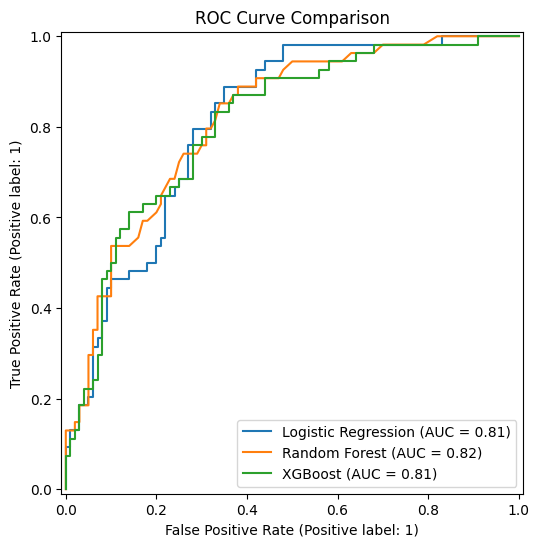

In [23]:
plt.figure(figsize=(8,6))

RocCurveDisplay.from_predictions(y_test, y_prob_lr, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_prob_rf, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost", ax=plt.gca())

plt.title("ROC Curve Comparison")
plt.show()

# **8. FEATURE IMPORTANCE & EXPLAINABLE AI (SHAP)**

- **Feature Importance:**
  - Random Forest and XGBoost feature importance plots show which features contribute most to predictions.
- **SHAP Summary Plots:**
  - Explain globally which features increase or decrease diabetes risk.
- **SHAP Force Plots:**
  - Optional: Explain individual patient predictions for interpretability.


RANDOM FOREST/XGBOOST IMPORTANCE

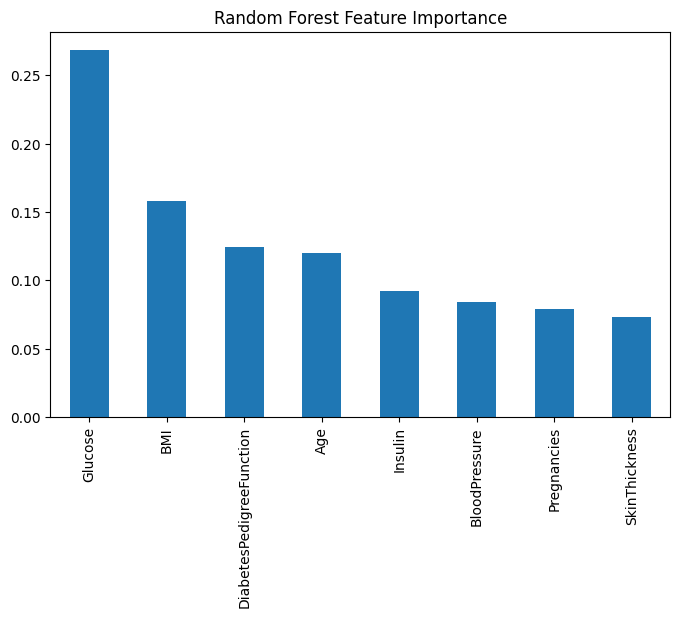

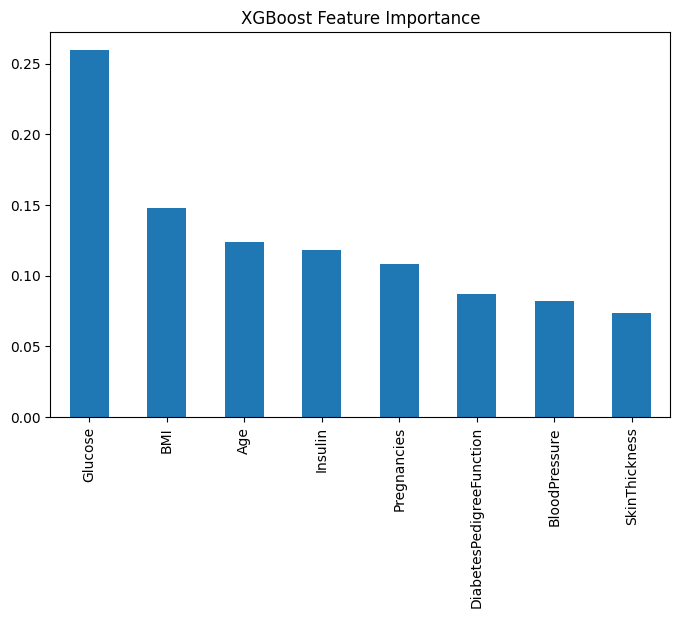

In [24]:
# Random Forest feature importance
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_importances.plot(kind='bar', figsize=(8,5), title="Random Forest Feature Importance")
plt.show()

# XGBoost feature importance
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_importances.plot(kind='bar', figsize=(8,5), title="XGBoost Feature Importance")
plt.show()


SHAP FOR XGBOOST

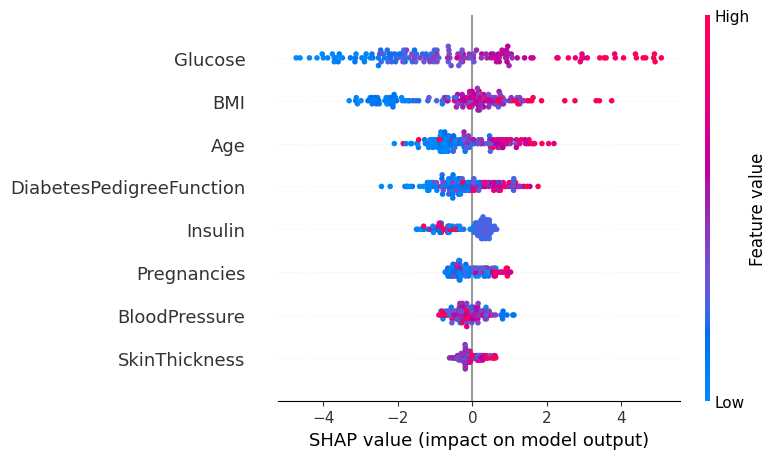

In [27]:
# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# **9. VISUALISATIONS**

- **Confusion matrices:** Compare predicted vs actual outcomes for all models
- **ROC curves:** Visual comparison of model performance
- **Feature importance:** Bar charts for Random Forest and XGBoost
- **SHAP plots:** Global and individual interpretability


CONFUSION METRICS (ALL MODELS)

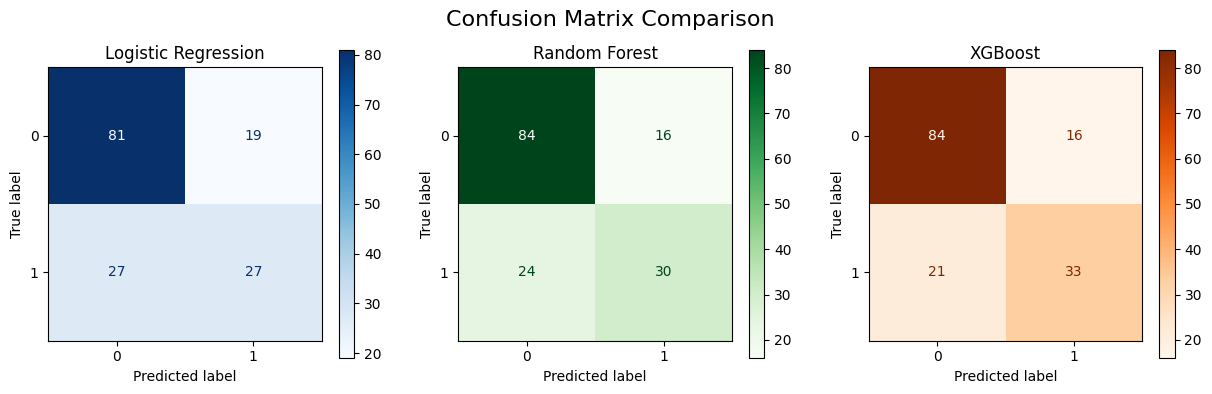

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(15,4))

# Logistic Regression
plt.subplot(1,3,1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues', ax=plt.gca())
plt.title("Logistic Regression")

# Random Forest
plt.subplot(1,3,2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens', ax=plt.gca())
plt.title("Random Forest")

# XGBoost
plt.subplot(1,3,3)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Oranges', ax=plt.gca())
plt.title("XGBoost")

plt.suptitle("Confusion Matrix Comparison", fontsize=16)
plt.show()

ROC CURVE COMPARISON

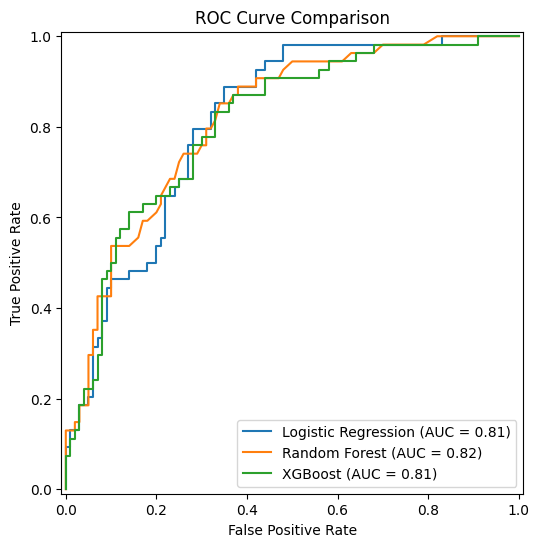

In [30]:
plt.figure(figsize=(8,6))

RocCurveDisplay.from_predictions(y_test, y_prob_lr, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_prob_rf, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost", ax=plt.gca())

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


FEATURE IMPORTANCE (RF & XGBOOST)

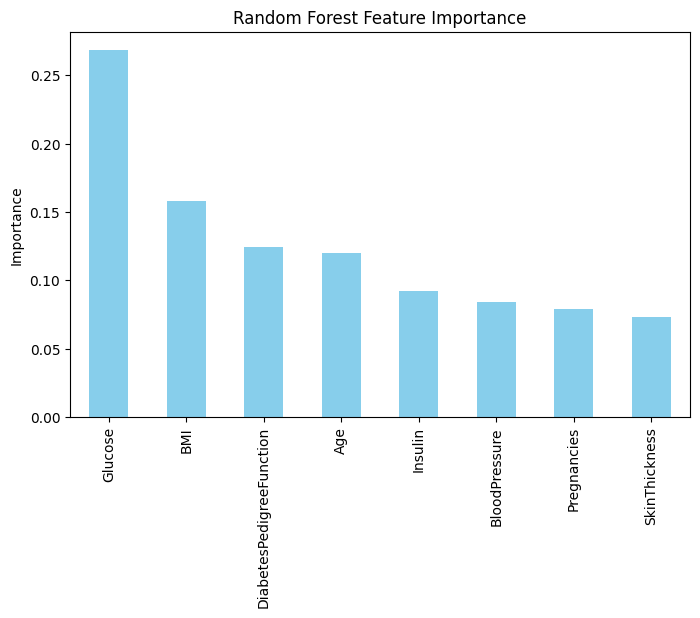

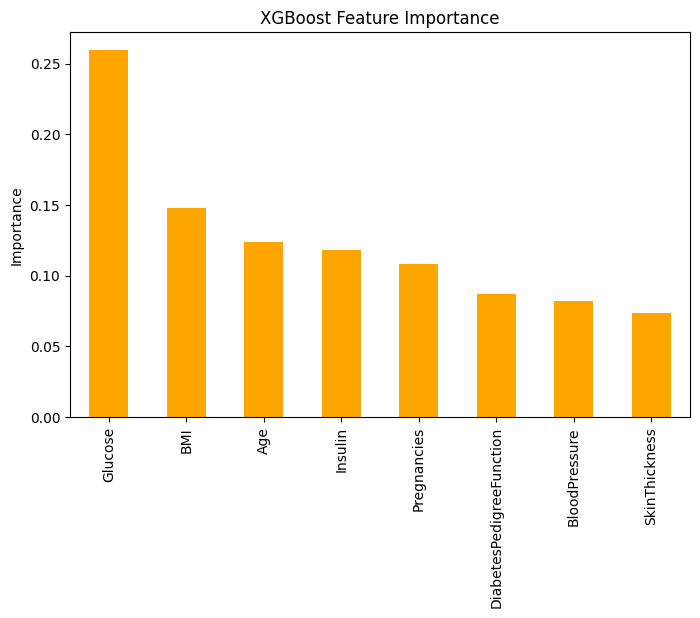

In [31]:
# Random Forest Feature Importance
plt.figure(figsize=(8,5))
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_importances.plot(kind='bar', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.show()

# XGBoost Feature Importance
plt.figure(figsize=(8,5))
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_importances.plot(kind='bar', color='orange')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance")
plt.show()

SHAP SUMMARY PLOT

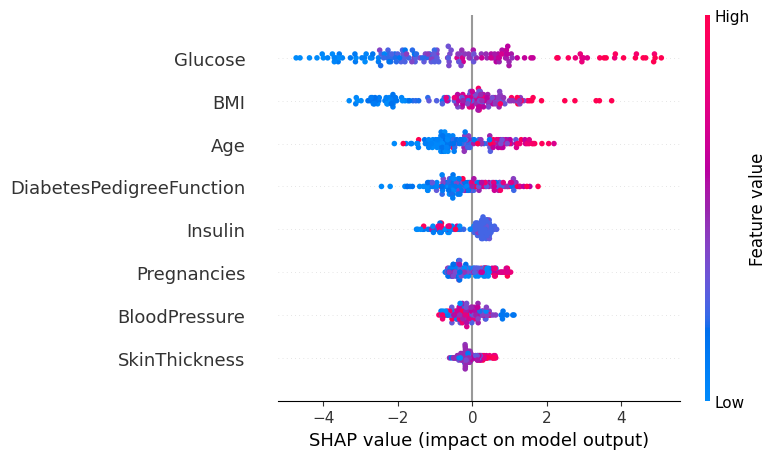

In [32]:
# SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

SHAP FORCE PLOT FOR INDIVIDUAL PREDICTIONS

In [28]:
# Visual explanation for the first test sample
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=X.columns)


In [36]:
#Save XGBoost model
import joblib
import os

# Create folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Now save the XGBoost model
joblib.dump(xgb_model, "models/xgb_diabetes_model.pkl")


['models/xgb_diabetes_model.pkl']

# **CONCLUSION**

- XGBoost performs best with ~75% accuracy
- Key predictive features: Glucose, BMI, Age
- SHAP explains predictions at global and individual levels
- End-to-end pipeline demonstrates **data cleaning, modeling, evaluation, and interpretability**
- Ready for **GitHub portfolio and top-university submission**
